**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [2]:
df = pd.read_csv('/content/hotel_bookings 2.csv')


**Exploratory Data Analysis and Data Cleaning**

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,3/7/2015


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
81566,City Hotel,1,192,2016,May,20,12.0,0.0,3.0,2.0,...,Non Refund,39.0,NaN,42.0,Transient,135.0,0.0,0.0,Canceled,14/12/2015
81567,City Hotel,1,192,2016,May,20,12.0,0.0,3.0,2.0,...,Non Refund,39.0,NaN,42.0,Transient,135.0,0.0,0.0,Canceled,14/12/2015
81568,City Hotel,1,192,2016,May,20,12.0,0.0,3.0,2.0,...,Non Refund,39.0,NaN,42.0,Transient,135.0,0.0,0.0,Canceled,14/12/2015
81569,City Hotel,1,192,2016,May,20,12.0,0.0,3.0,2.0,...,Non Refund,39.0,NaN,42.0,Transient,135.0,0.0,0.0,Canceled,14/12/2015
81570,City Hotel,1,192,2016,May,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(81571, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81571 entries, 0 to 81570
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81571 non-null  object 
 1   is_canceled                     81571 non-null  int64  
 2   lead_time                       81571 non-null  int64  
 3   arrival_date_year               81571 non-null  int64  
 4   arrival_date_month              81571 non-null  object 
 5   arrival_date_week_number        81571 non-null  int64  
 6   arrival_date_day_of_month       81570 non-null  float64
 7   stays_in_weekend_nights         81570 non-null  float64
 8   stays_in_week_nights            81570 non-null  float64
 9   adults                          81570 non-null  float64
 10  children                        81566 non-null  float64
 11  babies                          81570 non-null  float64
 12  meal                            

In [8]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')
# The format argument is specified as '%d/%m/%Y' to correctly parse dates in the format 'day/month/year'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81571 entries, 0 to 81570
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           81571 non-null  object        
 1   is_canceled                     81571 non-null  int64         
 2   lead_time                       81571 non-null  int64         
 3   arrival_date_year               81571 non-null  int64         
 4   arrival_date_month              81571 non-null  object        
 5   arrival_date_week_number        81571 non-null  int64         
 6   arrival_date_day_of_month       81570 non-null  float64       
 7   stays_in_weekend_nights         81570 non-null  float64       
 8   stays_in_week_nights            81570 non-null  float64       
 9   adults                          81570 non-null  float64       
 10  children                        81566 non-null  float64       
 11  ba

In [10]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,81571,81571,81570,81083,81570,81570,81570,81570,81570,81570,81570
unique,2,12,5,153,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled
freq,41511,9749,63631,40581,35441,66706,57755,49247,67546,60396,42123


In [11]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined' nan]
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV

In [12]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,1
stays_in_weekend_nights,1
stays_in_week_nights,1
adults,1


In [13]:
df.drop(['company','agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079.000000,81079
mean,0.533048,113.229110,2016.042021,28.172116,15.701032,0.985064,2.673208,1.860013,0.102209,0.008547,0.034226,0.113556,0.145586,0.203851,2.902416,98.305455,0.070918,0.469530,2016-06-10 23:14:58.634664960
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,21.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.340000,0.000000,0.000000,2015-11-16 00:00:00
50%,1.000000,78.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.100000,0.000000,0.000000,2016-05-24 00:00:00
75%,1.000000,175.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.500000,0.000000,1.000000,2017-01-02 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,20.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.498910,112.392319,0.754406,13.628237,8.783528,1.047839,2.062802,0.596651,0.399159,0.103294,0.181810,1.013473,1.664181,0.635467,20.322443,54.148823,0.260695,0.747249,NaN


In [16]:
df = df[df['adr'] < 5000]

Data Analysis and Visualization

In [17]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

,proportion
is_canceled,
1,0.533042
0,0.466958


is_canceled
1    0.533042
0    0.466958
Name: proportion, dtype: float64


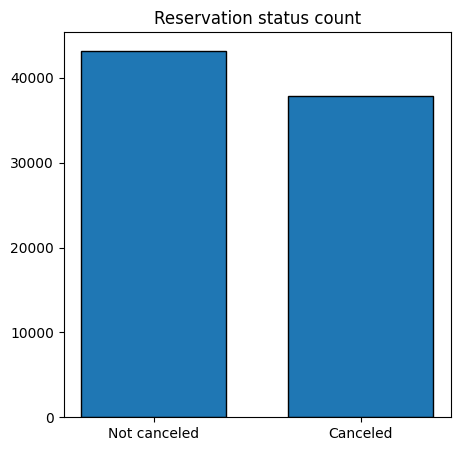

In [18]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,5))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

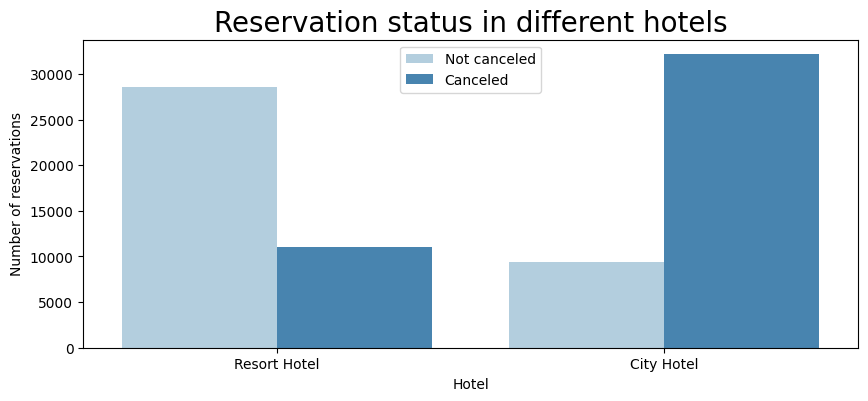

In [19]:
plt.figure(figsize = (10,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette='Blues')
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')
plt.legend(['Not canceled', 'Canceled'])
plt.show()

In [20]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.72025
1,0.27975


In [21]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
1,0.774818
0,0.225182


In [22]:
# The previous operations likely turned resort_hotel and city_hotel into Series.
# We need to ensure they are DataFrames before proceeding.
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

# Now you can perform the groupby and mean calculation
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

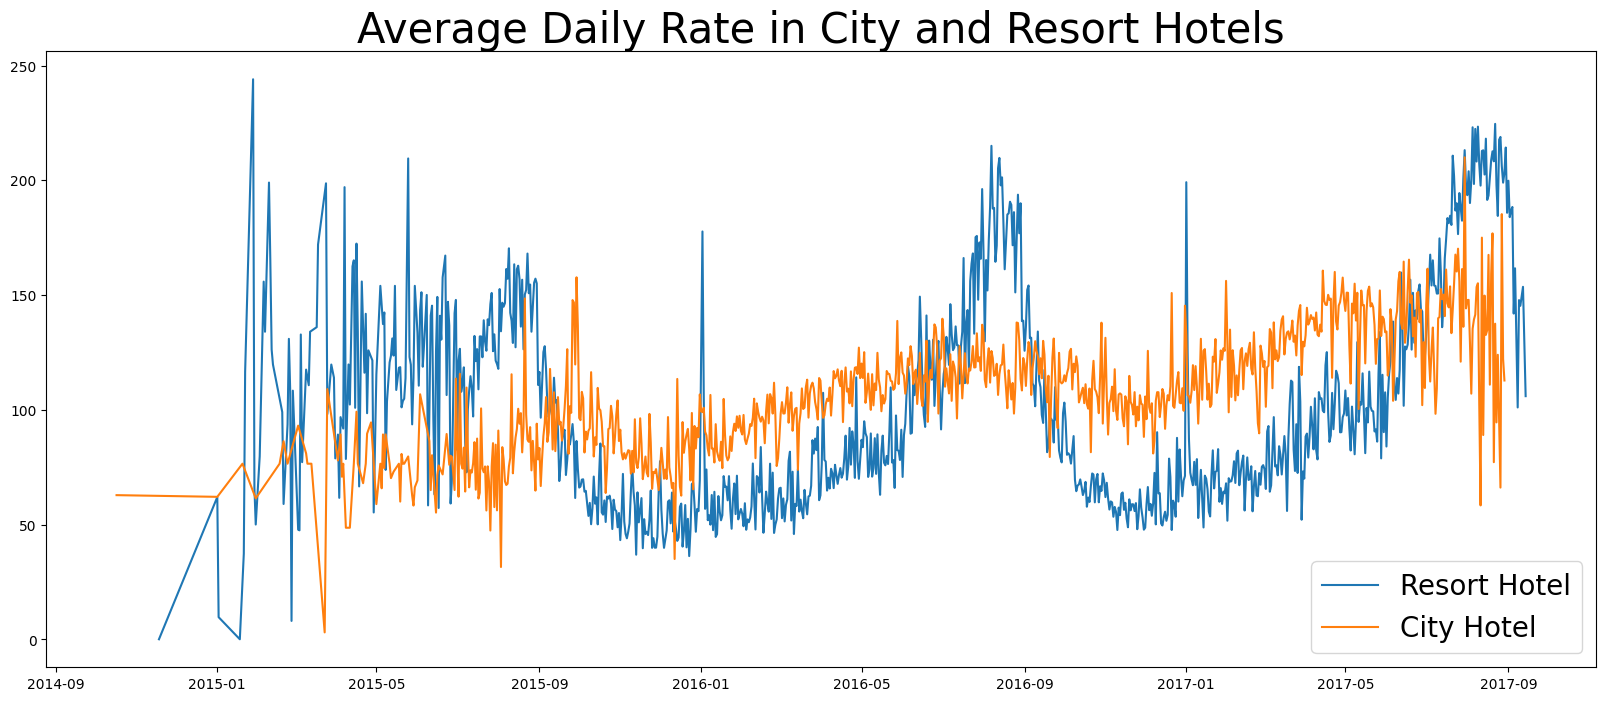

In [23]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotels', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

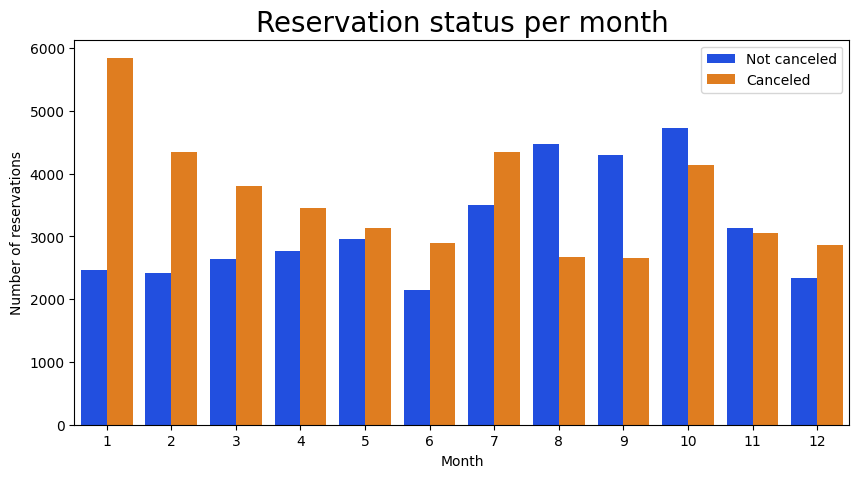

In [29]:
df['month']= df['reservation_status_date'].dt.month
plt.figure(figsize = (10,5))
ax1 = sns.countplot(x = 'month', hue= 'is_canceled', data = df, palette = 'bright')
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title('Reservation status per month', size = 20)
plt.xlabel('Month')
plt.ylabel('Number of reservations')
plt.legend(['Not canceled', 'Canceled'])
plt.show()


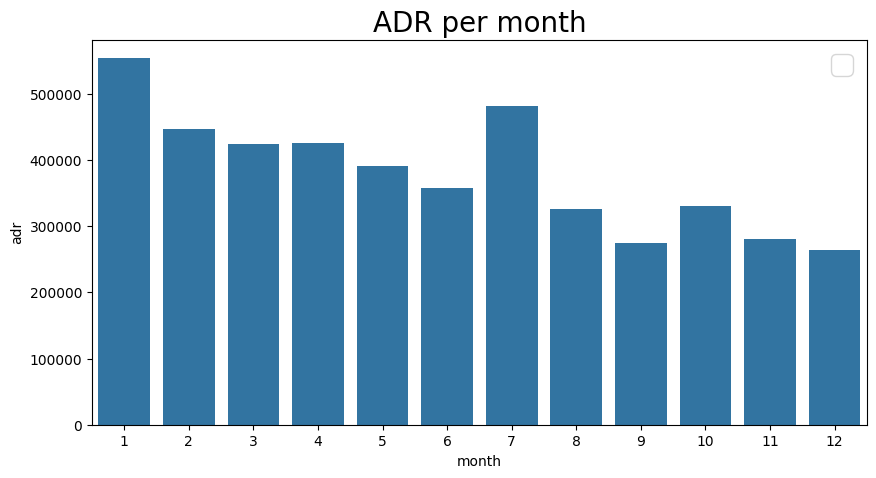

In [36]:
plt.figure(figsize = (10,5))
plt.title('ADR per month', fontsize = 20)
# Define a list of colors for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'black']  # Add more if needed
# Use the data argument to specify the DataFrame and x and y to specify the columns
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.legend(fontsize=20) # Changed FontSize to fontsize for consistency
plt.show()

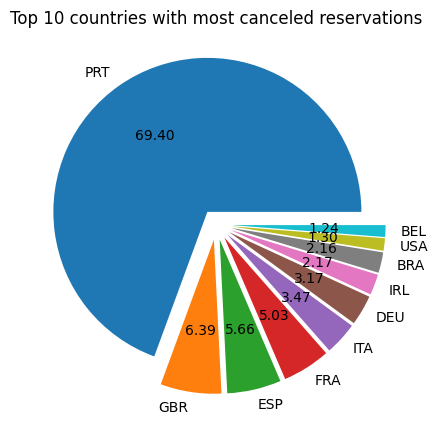

In [38]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (10,5))
plt.title('Top 10 countries with most canceled reservations')
plt.pie(top_10_country, labels = top_10_country.index, autopct = '%.2f', explode = [0.1]*10)
plt.show()

In [39]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,35366
Groups,17058
Offline TA/TO,16507
Direct,8252
Corporate,3400
Complementary,454
Aviation,41


In [40]:
df['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.436197
Groups,0.210390
Offline TA/TO,0.203594
Direct,0.101779
Corporate,0.041935
Complementary,0.005600
Aviation,0.000506


In [41]:
cancelled_data['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.478851
Groups,0.272248
Offline TA/TO,0.182007
Direct,0.043778
Corporate,0.020339
Complementary,0.001828
Aviation,0.000949


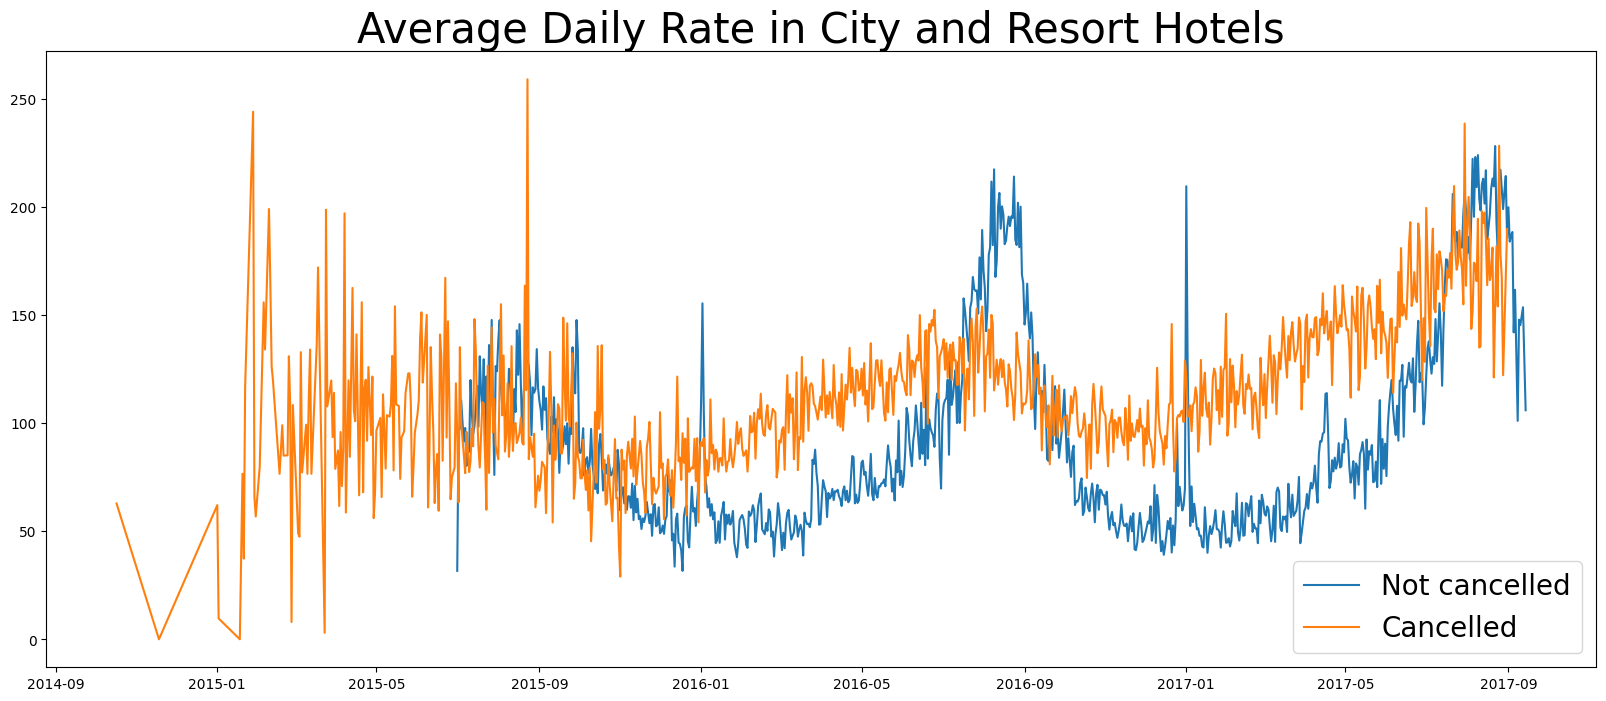

In [55]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled'] == 0] # Changed 'is canceled' to 'is_canceled' to match the actual column name in the DataFrame.
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotels', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'Not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 20)
plt.show()

In [56]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

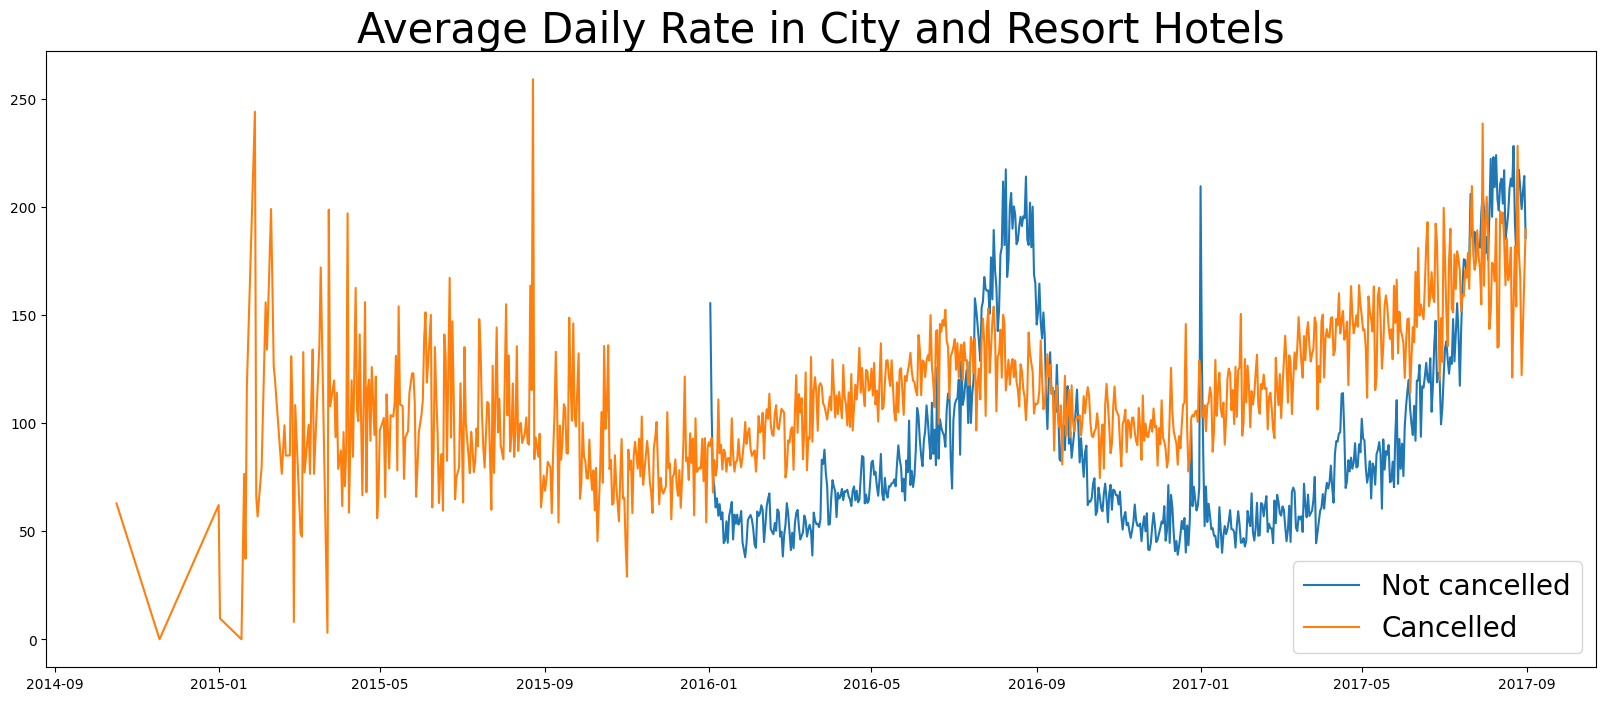

In [59]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotels', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'Not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 20)
plt.show()